# Dividir el dataset en conjunto de entrenamiento y de testing 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
data= pd.read_csv("../datasets/ads/Advertising.csv")

In [6]:
#distribución uniforme del mismo conjunto de datos 
a=np.random.randn(len(data))

(array([ 4.,  3., 18., 37., 48., 36., 33., 16.,  4.,  1.]),
 array([-2.68996453, -2.13617816, -1.58239179, -1.02860542, -0.47481906,
         0.07896731,  0.63275368,  1.18654005,  1.74032642,  2.29411279,
         2.84789916]),
 <a list of 10 Patch objects>)

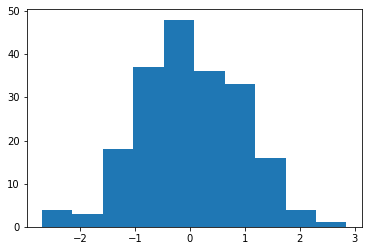

In [7]:
plt.hist(a)

In [9]:
check = (a<0.8)
training = data[check]
testing =data[~check]

In [11]:
#depende de la distribución normal
len(training), len(testing)

(159, 41)

In [14]:
import statsmodels.formula.api as smf 
lm=smf.ols(formula="Sales~TV+Radio", data=training).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     669.7
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           2.72e-77
Time:                        10:22:25   Log-Likelihood:                -310.75
No. Observations:                 159   AIC:                             627.5
Df Residuals:                     156   BIC:                             636.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0571      0.333      9.181      0.000       2.399       3.715
TV             0.0455      0.002     28.038      0.000       0.042       0.049
Radio          0.1872      0.009     20.503      0.000       0.169       0.205
==============================================================================
Omnibus:                       57.434   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.487
Skew:                          -1.469   Prob(JB):                     2.33e-35
Kurtosis:                       6.930   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R cuadrado de 0.89 el ajustado de 0.89 y el F estadístico alto (por las nubes), el probabilístico chiquito, los estadísticos t son elevados para el de TV y de Radio, todos los parámetros están bien. Los interceptos se parecen al último modelo, el estadístico F es grande pero no es tan grande porque el dataset es más pequeño. La suma del cuadrado de las diferencias es menor porque hay menos datos y esto se utiliza para el estadístico F. 
Sales= 3.0571	+ 0.0455 TV + 0.1872 Radio 

## Validación del modelo con el conjunto de testing 

In [16]:
#aplicando los datos para un modelo y hago una predicción 
#comprobar cómo diverge la predicción del original
sales_pred= lm.predict(testing)
sales_pred

8       3.841541
12     10.710037
20     18.181856
30     21.684903
31     11.452322
37     15.703233
38     10.016195
43     14.046023
49      8.291825
50     12.730863
51      9.423459
58     21.935033
61     22.941966
69     21.141230
70     17.846249
71     10.730996
72     10.453515
86     11.676976
92     19.235597
109    19.716111
113    16.452413
126    10.693079
131    15.670001
132     8.530469
133    19.331175
134    11.961366
136    11.521934
137    20.923350
152    16.411619
159    12.495145
160    14.295937
164    11.142663
171    14.455914
177    12.263380
178    16.081101
181    14.012460
189     6.172951
190    12.547632
196     8.261566
197    12.853629
199    15.230393
dtype: float64

In [17]:
SSD =sum((testing["Sales"]-sales_pred)**2)
SSD

94.37723750336859

In [18]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.575947814252281

In [19]:
sales_mean=np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.11604500787418018

In [20]:
#el error es de 11%, este conjunto de datos nos da este 
#error 

# Resumen de las regresiones lineales 

Tenemos cuatro modelos: 
* 1. Ventas y TV: 
* 2. Ventas y TV con Newspaper 
* 3. Ventas y TV con Radio 
* 4. Ventas y los tres. 
El modelo lineal es bueno, las variables tienen que elegirse con los siguientes criterios, el R2 aumenta cuando se añade una variable predictora al modelo, esto no es sinónimo de incrementar la funcionalidad del modelo. El R2 ajustado es el que debe verse aunque no siempre aumenta, también hay que tener en cuenta el F ajustado, no solo el R2. Cuanto menor sea el P valor es mejor añadir esa variable al modelo. 
Hay que tener en cuenta el R2 ajustado, el estadístico F, el p-valor y el error 